# Inteligencja Obliczeniowa w Analizie Danych Cyfrowych

## Lab 5. Przestrzenie Ciągłe

### Miłosz Góralczyk


Jak ostatnio, umieściłem część raportu nad częścią kodu, w celu lepszego dostępu dla sprawdzającego. 

Aby wygenerować ponownie dane, również te wykorzystane w Raporcie, należy najpierw uruchomić komórki częśći II. Kod źródłowy laboratorium

## I. Raport z Laboratorium

Celem laboratorium było przetestowanie oraz uruchomienie różnych hiperparametrów oraz architektur, w celu znalezienia potymalnego połączenia do trenowania oraz rozwiązywania problemów z domeny Przestrzenii Ciągłej

Laboratorium zrealizowane za pomocą 'gymnasium', 'stable_baselines3'

### Środowisko

Wybrane środowisko, to dostępne w module gymnasium-box2d, o nazwie bipedal-walkerv3

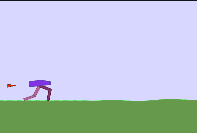

Celem agenta jest przejść jak najdłuższy dystans bez upadku, manipulując dwoma nogopodobnymi dwuczłonowymi kończynami

Wybrana wersja, normalna, zakłada lekko nierówny teren, bez kamieni i większych nierówności

### Przestrzeń akcji

Akcje to wartości prędkości silnika w zakresie [-1, 1] dla każdego z 4 stawów biodrowych i kolanowych.
### Przestrzeń obserwacyjna

Stan składa się z prędkości kątowej kadłuba, prędkości kątowej, prędkości poziomej, prędkości pionowej, położenia stawów i prędkości kątowej stawów, kontaktu nóg z podłożem oraz 10 pomiarów dalmierza. W wektorze stanu nie ma współrzędnych.
### Nagrody

Za poruszanie się do przodu przyznawana jest nagroda, w sumie ponad 300 punktów do samego końca. Jeśli robot upadnie, dostaje -100. Zastosowanie momentu obrotowego silnika kosztuje niewielką ilość punktów. Bardziej optymalny agent uzyska lepszy wynik.
### Stan początkowy

Walker zaczyna na lewym krańcu terenu z kadłubem poziomo, obie nogi w tej samej pozycji z ugiętymi konalami

### Zakończenie episodu
Episod zakończy się, jeśli kadłub zetknie się z ziemią lub jeśli walker pokona całą trasę.

## Wyniki- część 1.

Przetestowane zostały trzy zbiory hiperparametrów, zgodnie z instrukcjami każdy zbiór został uruchomiony 10 razy na 50.000 episodach.

Daje nam to liczbę końcową 1.500.000 powtórzeń pętli uczącej dla tej części laboratorium..

### Setup 1.

        "learning_rate": 0.0005,
        "n_steps": 15,
        "gamma": 0.99
        

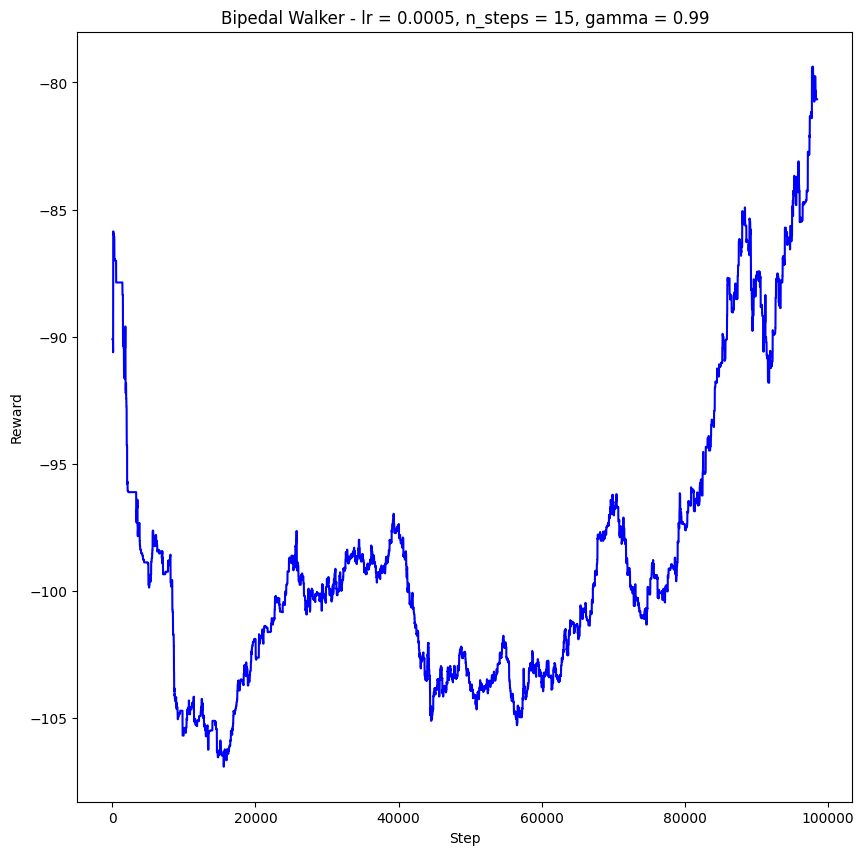

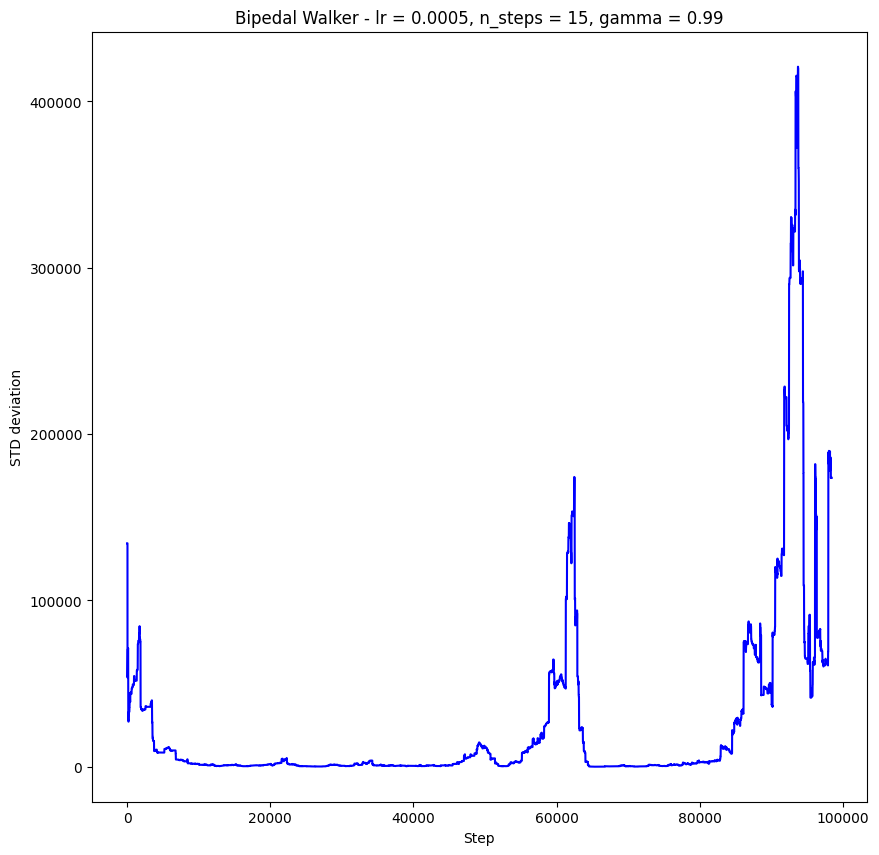

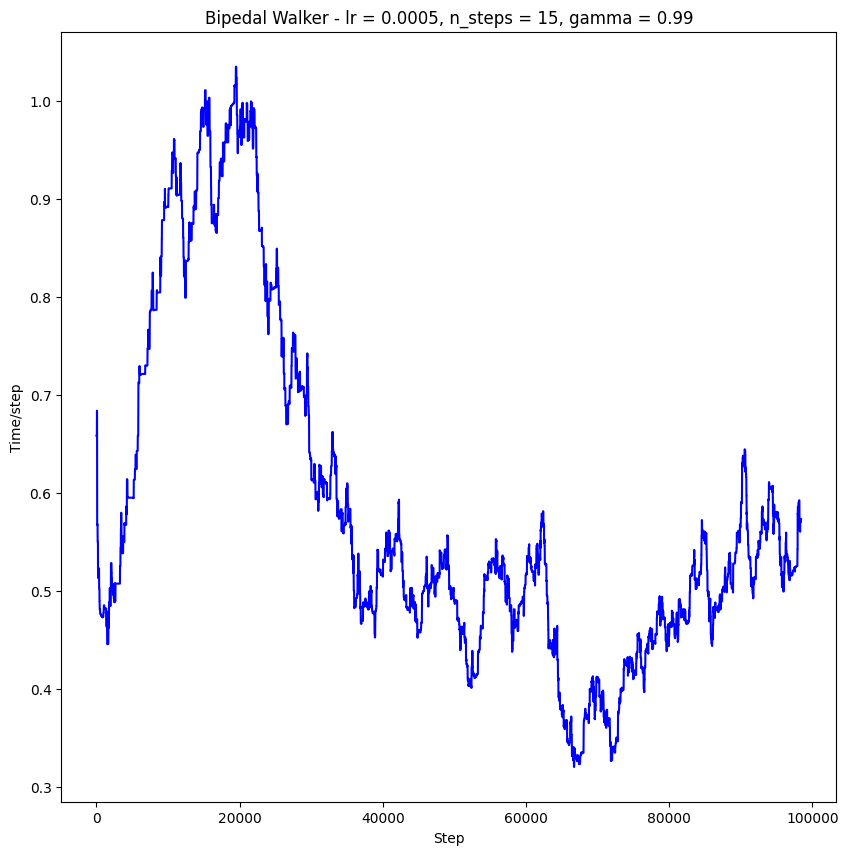

### Setup 2.

        "learning_rate": 0.0003,
        "n_steps": 10,
        "gamma": 0.999

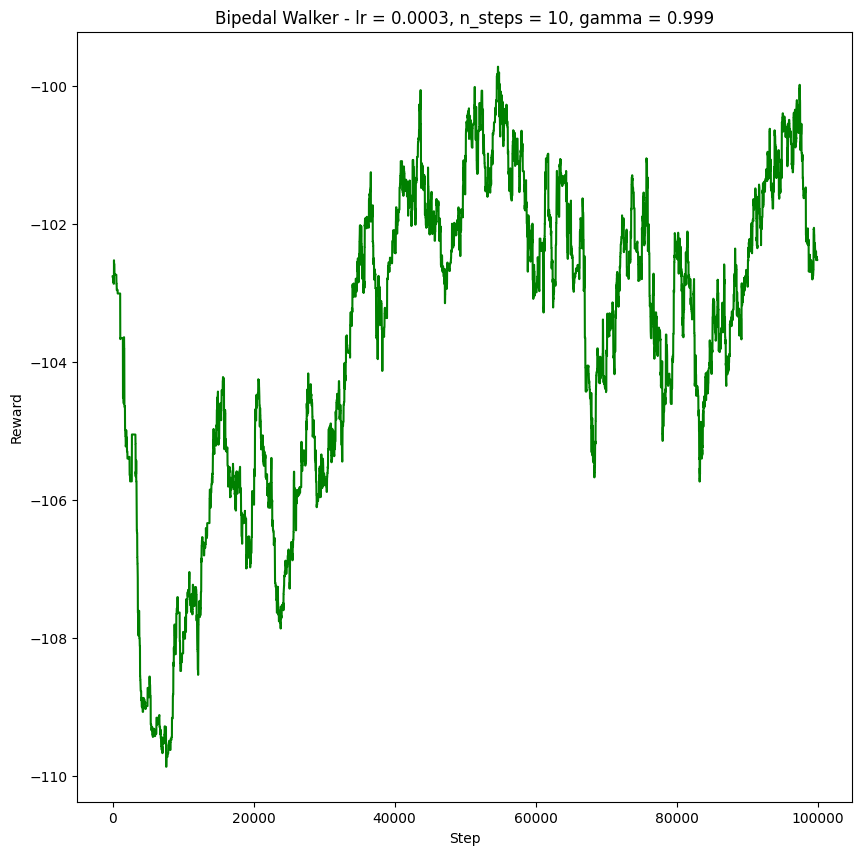

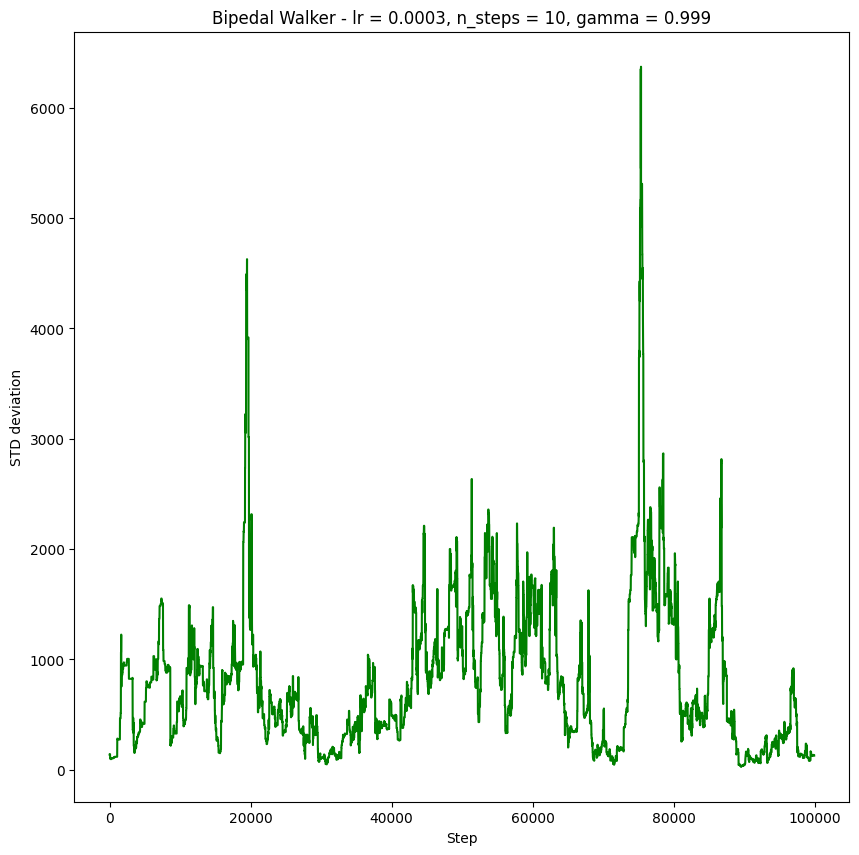
        
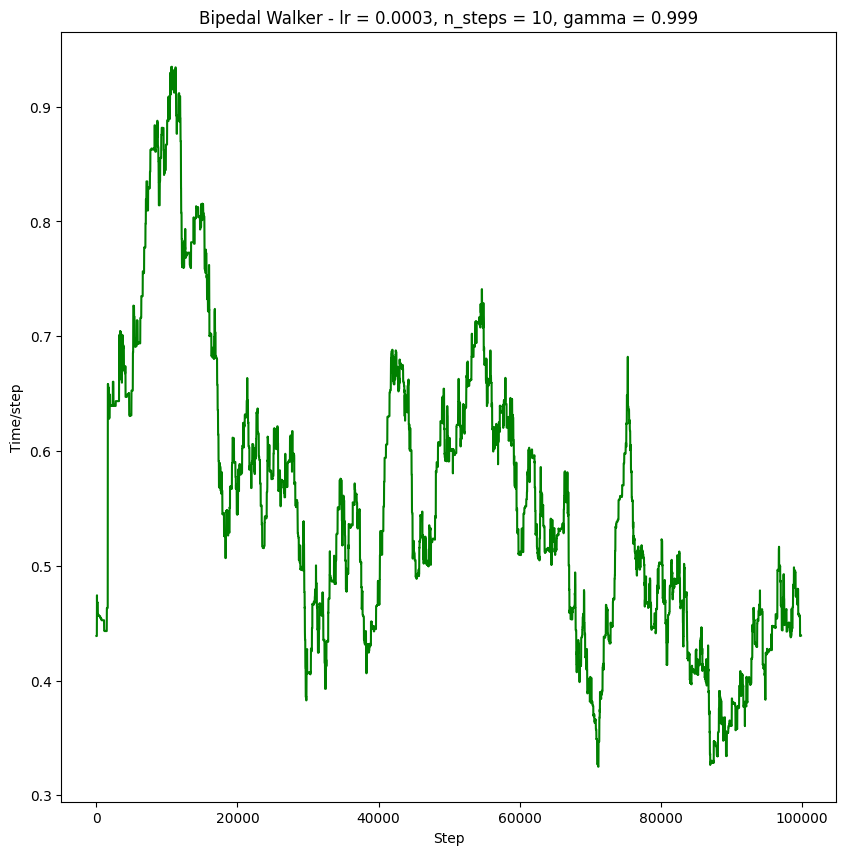

### Setup 3.

        "learning_rate": 0.0008,
        "n_steps": 25,
        "gamma": 0.97

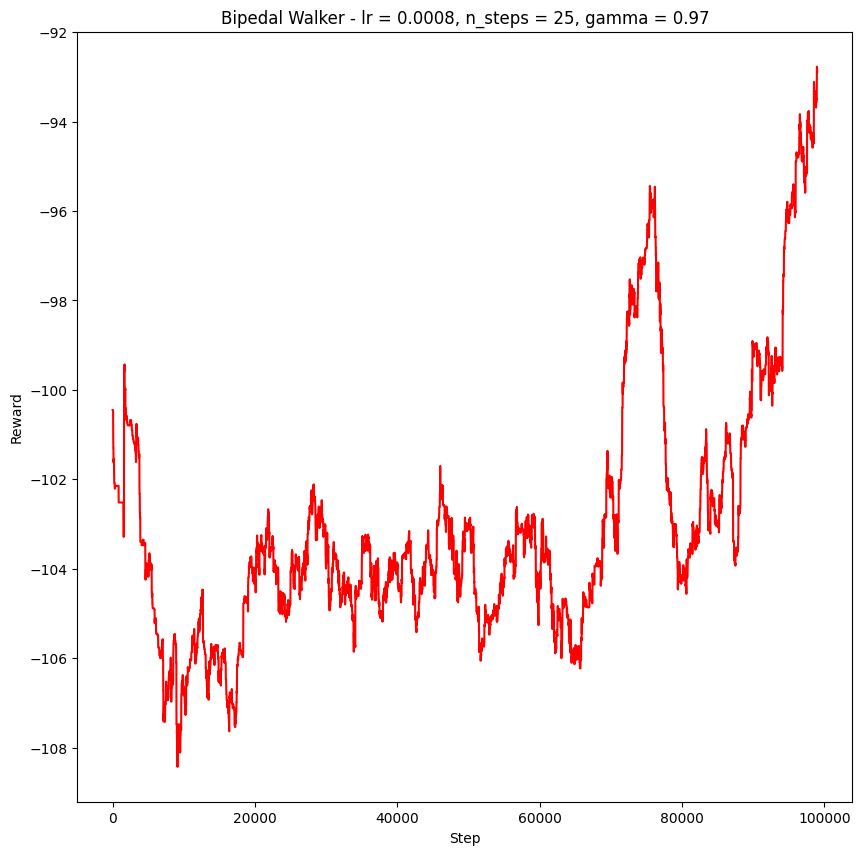

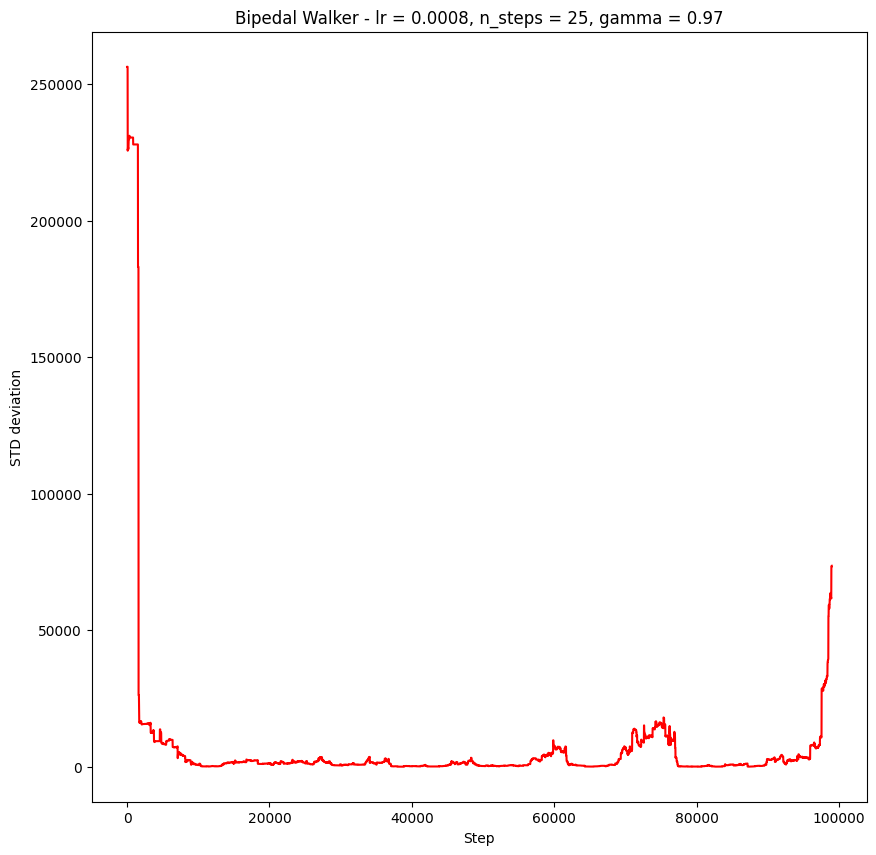

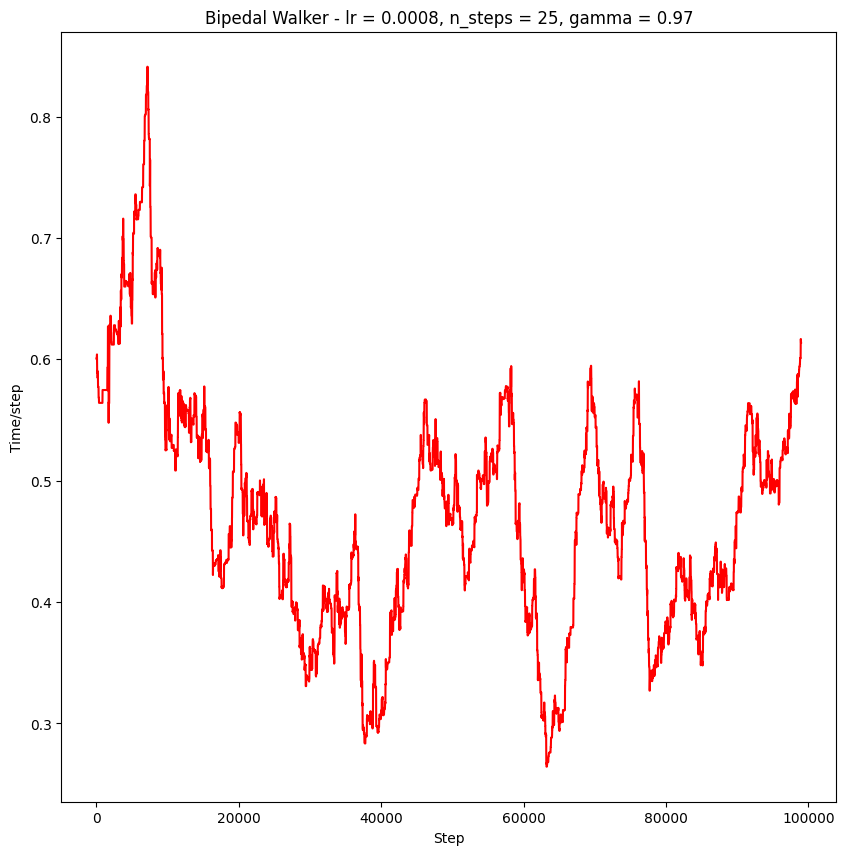

Najwyższy wynik, jak i najpewniejsze statystyki posiadał model o Hiperparametrach:

        "learning_rate": 0.0005,
        "n_steps": 15,
        "gamma": 0.99

## Wyniki - część 2.

Dwie sieci neuronowe powstały w oparciu o architekturę używając torch.nn

- Basic: 2 ukryte warstwy, 32 i 64 jednostki, funkcja aktywacji ReLU
- Advanced: 3 ukryte warstwy, 32, 64, 128 jednostek, funkcja aktywacji Sigmoid

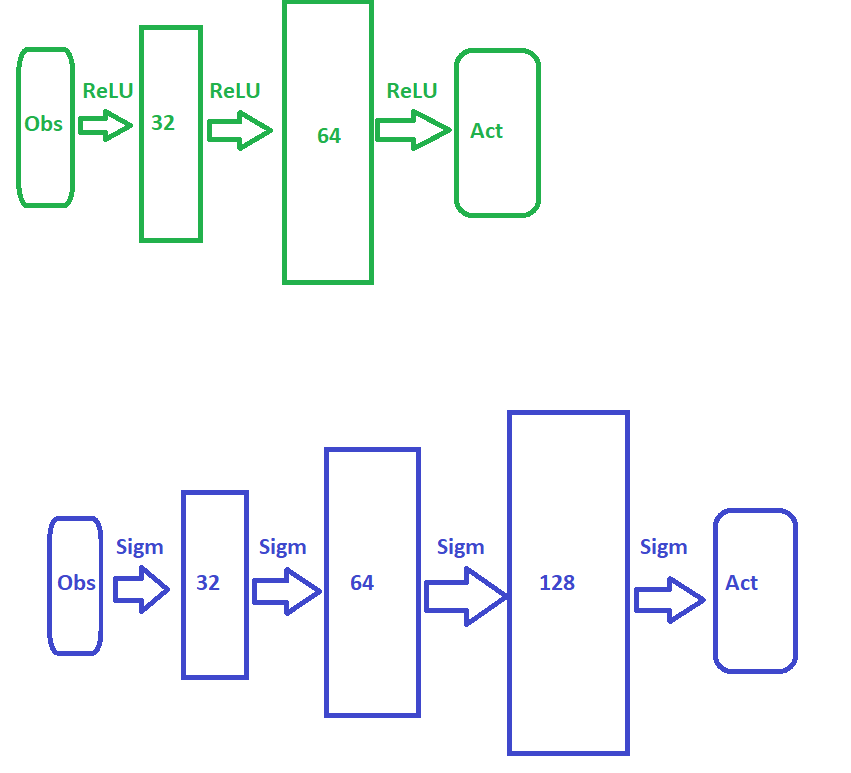

Wejście ma kształt Observation Space, wyjście ma kształ Action Space

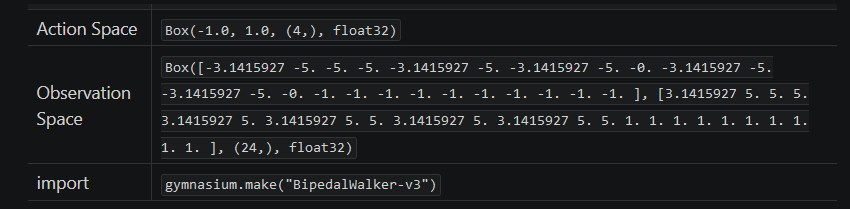

To oznacza że na wejściu sieć otrzymuje 24 wartości o środowisku, wyrzucając 4 wartości odpowiedzi agenta

Dokładna struktura sieci:
``` python
SimplerPolicy(
  (features_extractor): SimplerNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
      (5): ReLU()
    )
  )
  (pi_features_extractor): SimplerNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
      (5): ReLU()
    )
  )
  (vf_features_extractor): SimplerNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
      (5): ReLU()
    )
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=4, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)



AdvancedPolicy(
  (features_extractor): AdvancedNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): Tanh()
      (8): Linear(in_features=64, out_features=4, bias=True)
      (9): Tanh()
    )
  )
  (pi_features_extractor): AdvancedNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): Tanh()
      (8): Linear(in_features=64, out_features=4, bias=True)
      (9): Tanh()
    )
  )
  (vf_features_extractor): AdvancedNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): Tanh()
      (8): Linear(in_features=64, out_features=4, bias=True)
      (9): Tanh()
    )
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=4, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)
```

Simple 

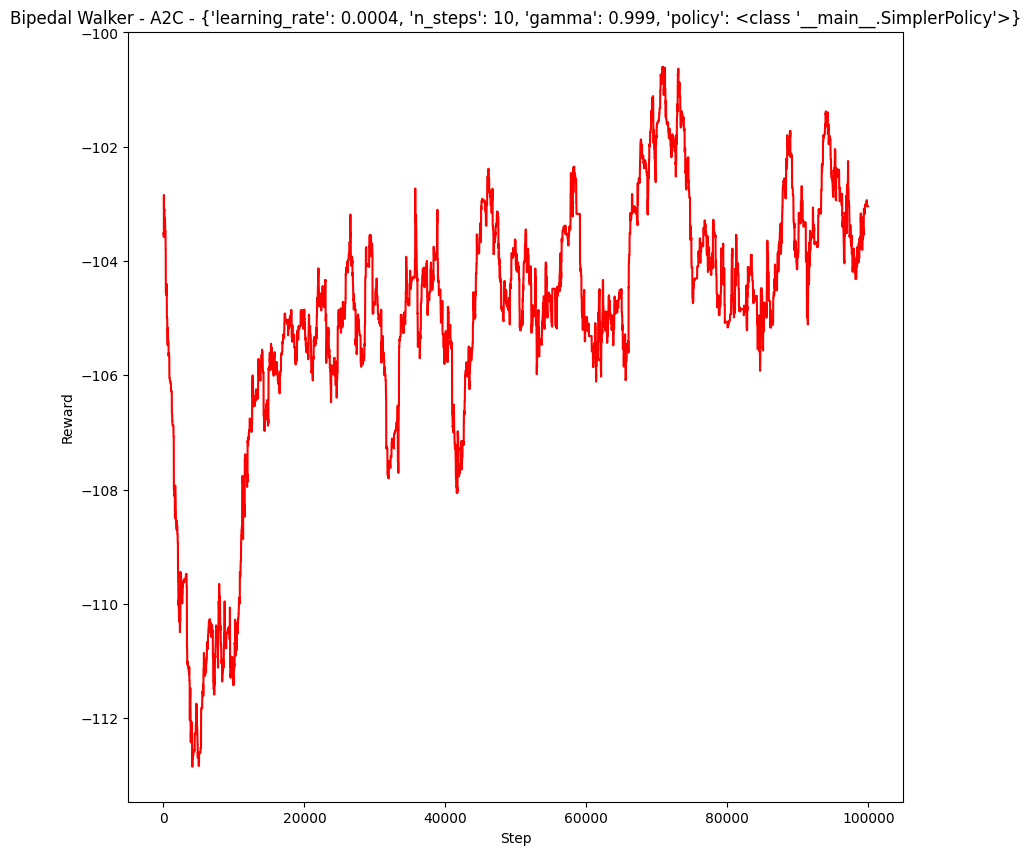

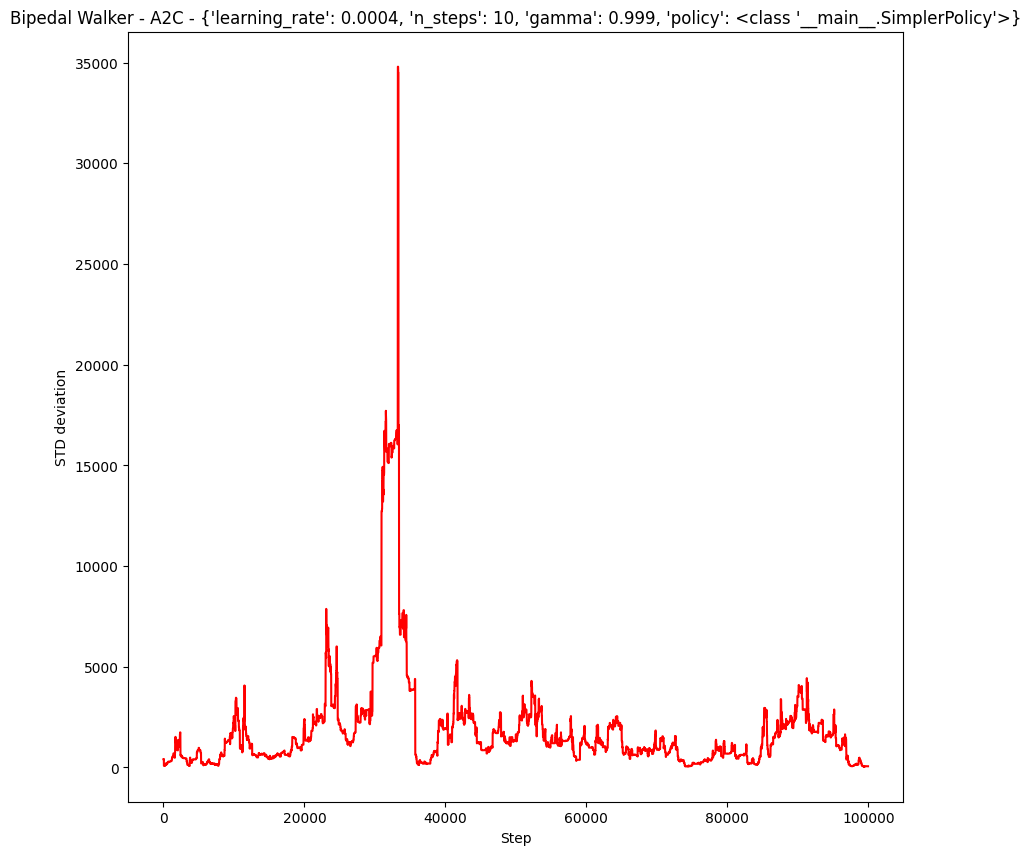

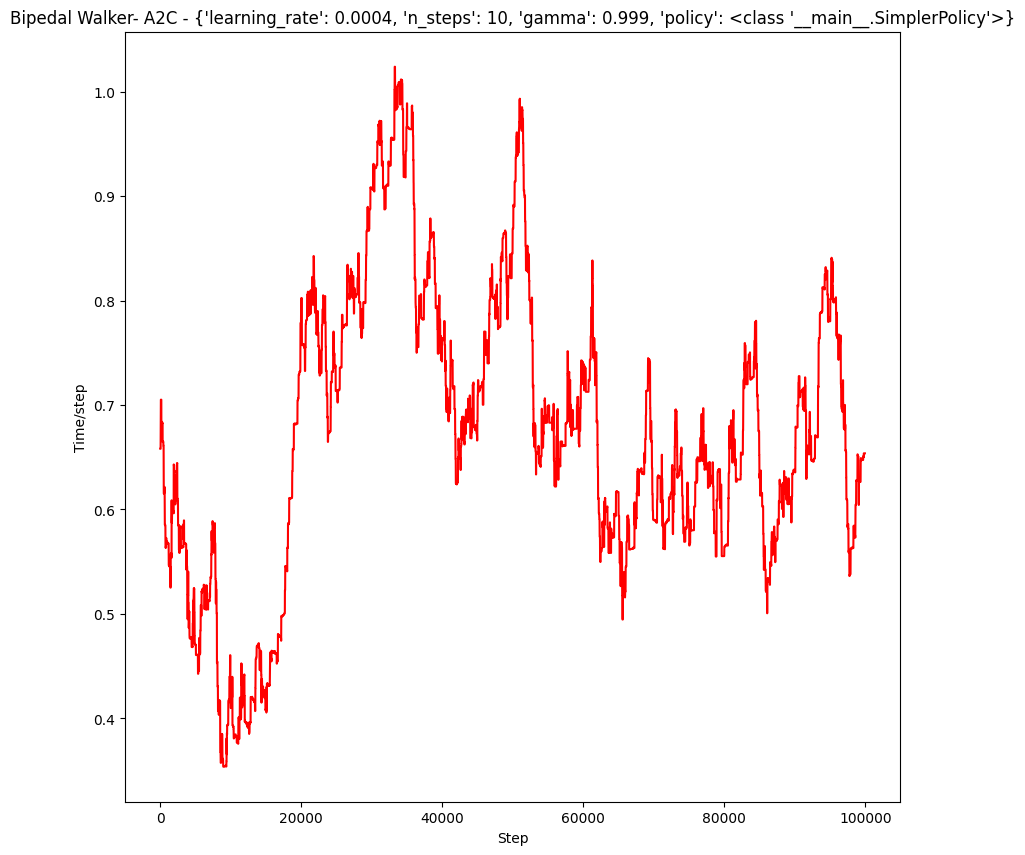

Advanced

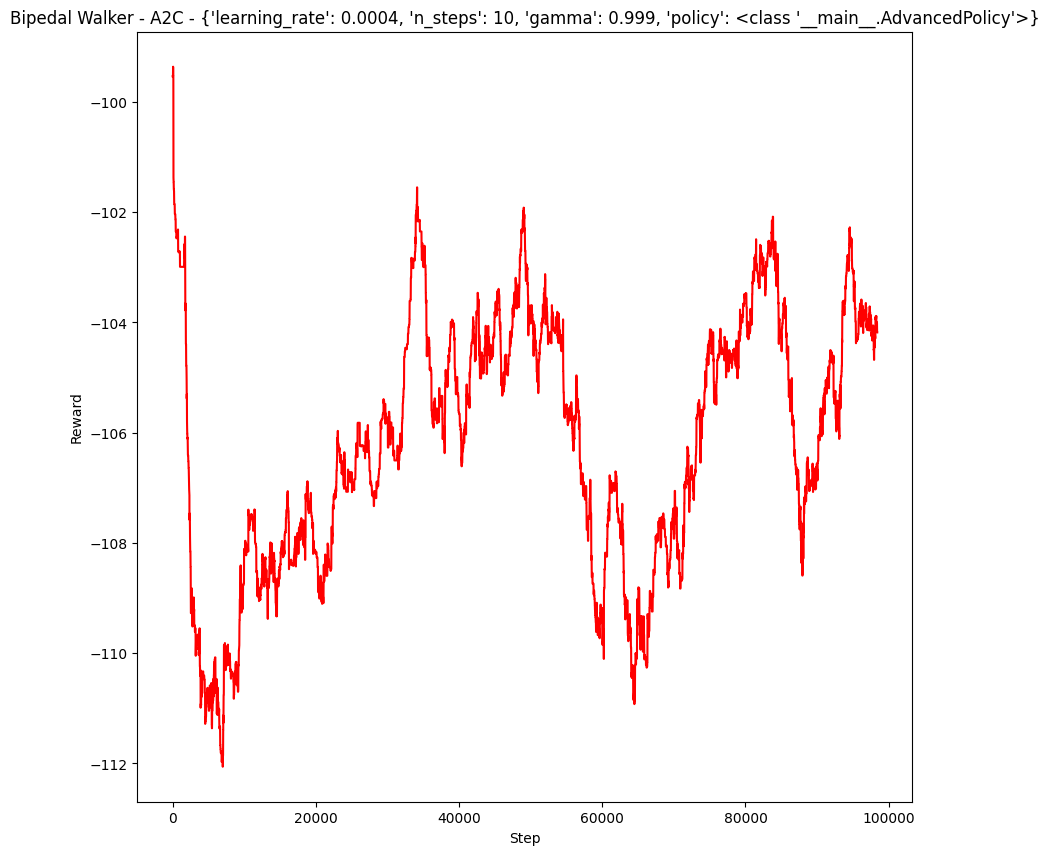

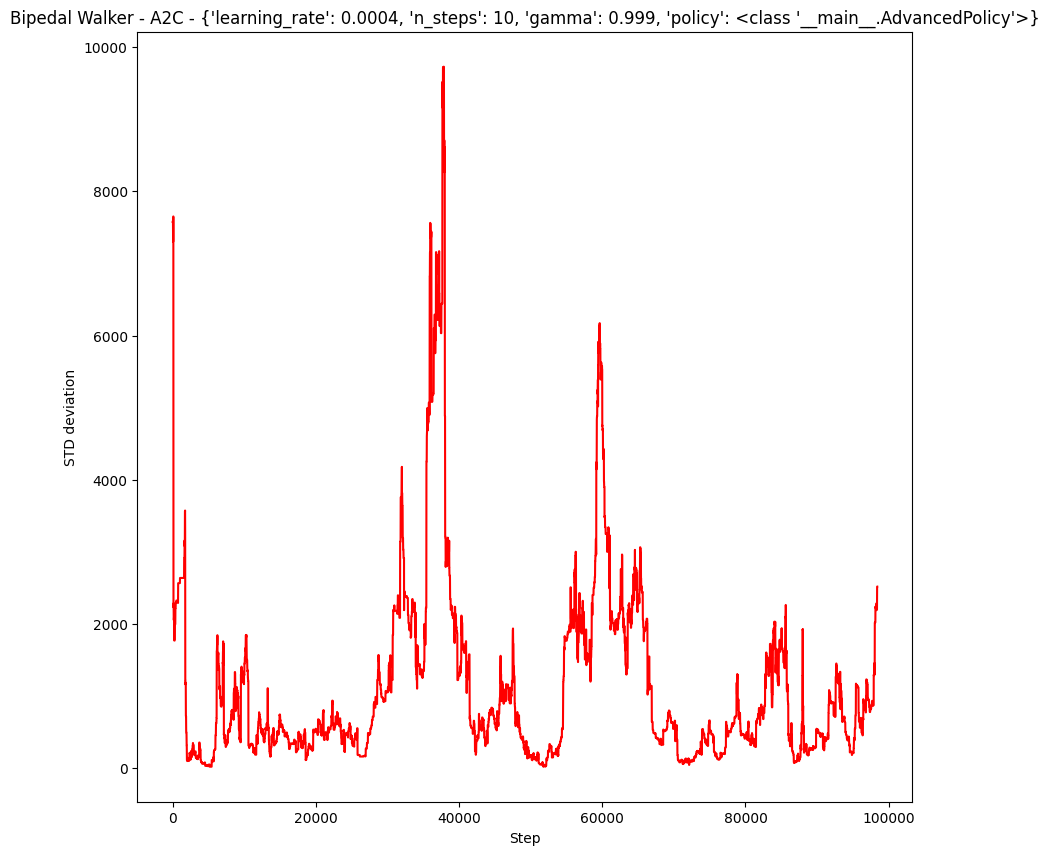

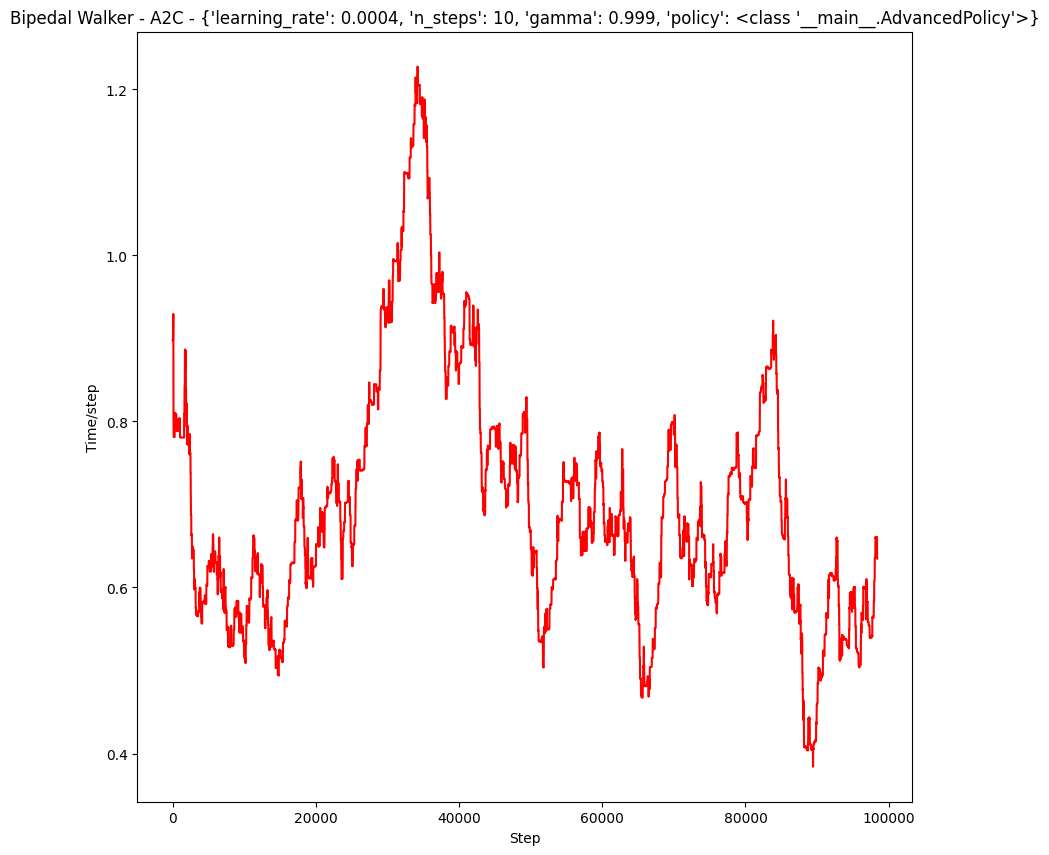

## Wyniki część 3.

wybranie najlepszego modelu, symulacja na nim w trybie deterministycznym

``` python
Best model:  <stable_baselines3.a2c.a2c.A2C object at 0x0000028EEB77F9A0>
Average reward:  -96.20711684644843
STD deviation:  0.0005052327139275685
best model hyperparameters: AdvancedPolicy(
  (features_extractor): AdvancedNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): Tanh()
      (8): Linear(in_features=64, out_features=4, bias=True)
      (9): Tanh()
    )
  )
  (pi_features_extractor): AdvancedNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): Tanh()
      (8): Linear(in_features=64, out_features=4, bias=True)
      (9): Tanh()
    )
  )
  (vf_features_extractor): AdvancedNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): Tanh()
      (8): Linear(in_features=64, out_features=4, bias=True)
      (9): Tanh()
    )
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=4, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)
```

Na tym modelu zostało wywołany deterministyczne nauczanie na 50.000 epizodów.

Uczenie zostało uruchomione z wyłączonym trybem eksploracji, dzięki czemu model zawsze wybierał 'optymalny' ze swojego punktu widzenia wynik.

Wyniki prezentują się następująco:

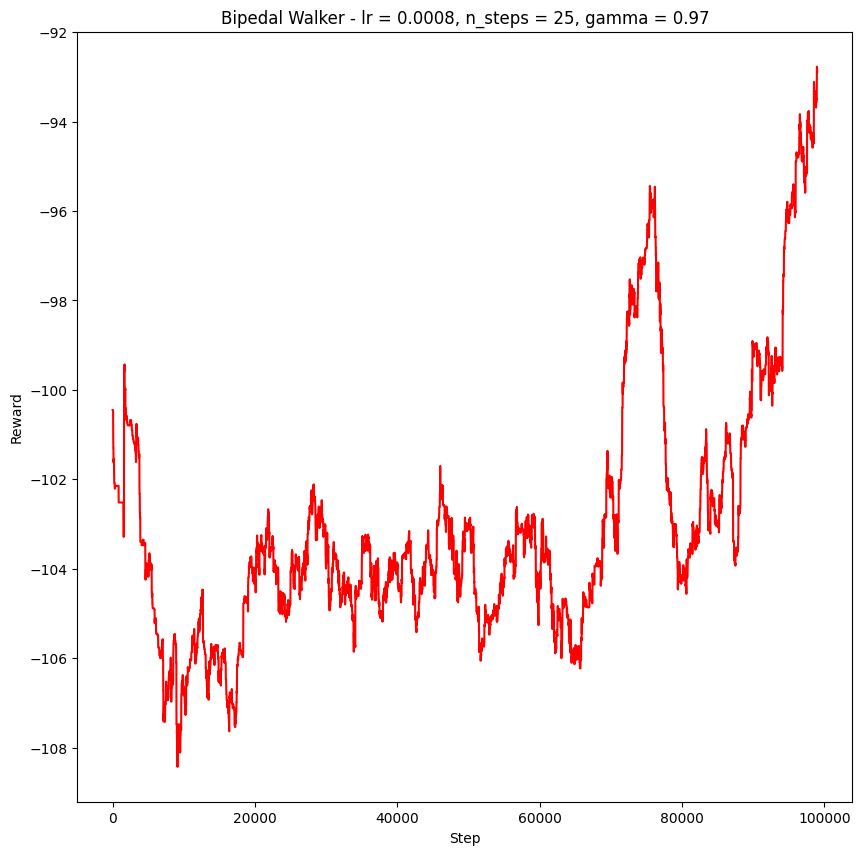

## Wnioski

We wszystkich modelach moża zaobserwować początkowe szukanie strategii, które po około dwudziestu tysiącach kroków zaczyna się wyłaniać jako prawidłowe rozwiązanie rozgrywki

Poziom skomplikowania sieci wpływa pozytywnie na wyniki nagrody w określonej ilości kroków, ale również wydłuża czas pojedyń czego kroku.

Odrycie 'perfekcyjnych' parametrów modelu jest sprawą nietrywialną, lecz może nagrodzić podwyższeniem wydajności i wyniku końcowego programu.

## II. Kod źródłowy oraz pozyskanie danych

In [60]:
import gymnasium
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'

In [61]:
from typing import Final, Any, Dict, List
from os.path import exists
from os import makedirs

HYPERPARAMETERS: List[Dict[str, Any]] = [
    {
        "learning_rate": 0.0005,
        "n_steps": 15,
        "gamma": 0.99,
        "policy": "MlpPolicy",
    },
    {
        "learning_rate": 0.0003,
        "n_steps": 10,
        "gamma": 0.999,
        "policy": "MlpPolicy",
    },
    {
        "learning_rate": 0.0008,
        "n_steps": 25,
        "gamma": 0.97,
        "policy": "MlpPolicy",
    },
]

ATTEMPTS: Final[int] = 10
STEPS_PER_ATTEMPT: Final[int] = 50000

LOG_DIR: Final[str] = "./logs"

if not exists(LOG_DIR):
    makedirs(LOG_DIR)

rewards: List = []
means: List = []
s_devs: List = []
time: List = []
mean_times: List = []

In [62]:
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.monitor import load_results
from stable_baselines3.common.results_plotter import ts2xy


class DataLoggerCallback(BaseCallback):
    def __init__(self, log_dir: str, frequency: int = 6, verbose: int = 0) -> None:
        super().__init__(verbose)
        
        self.log_dir = log_dir
        self.frequency = frequency
        self.episode_rewards = []
        self.times = []

    def _on_step(self) -> bool:
        if self.n_calls % self.frequency == 0:
            
            results = load_results(self.log_dir)
            x, y = ts2xy(results, 'timesteps')
            current_time = results['t']
            
            if len(x) > 0:
                self.episode_rewards.append(np.mean(y[-12:]))
                self.times.append(np.mean(np.diff(current_time, prepend=0)[-12:]))

        return True

In [66]:
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.a2c import A2C


def generate_with_hyperparameters(hyperparams: Dict[str, Any]) -> A2C:
    global ATTEMPTS, STEPS_PER_ATTEMPT, LOG_DIR, rewards, means, s_devs, time

    env = gymnasium.make("BipedalWalker-v3")
    env = Monitor(env, LOG_DIR)
    env.reset()
    
    best_model = (None, None)

    for attempt_id in range(ATTEMPTS):
        model = A2C(env=env, verbose=1, device="cpu", **hyperparams)
        logger = DataLoggerCallback(LOG_DIR)
        
        model.learn(total_timesteps=STEPS_PER_ATTEMPT * 2, callback=logger)

        rewards.append(
            logger.episode_rewards
        )
        time.append(
            logger.times
        )
    
        if best_model[0] is None and best_model[1] is None:
            best_model = (model, logger)
        elif sum(logger.episode_rewards) > sum(best_model[1].episode_rewards):
                best_model = (model, logger)

    env.close()
    return best_model

In [67]:
def compute_mean_and_std() -> None:
    global STEPS_PER_ATTEMPT, rewards, means, s_devs, time, mean_times

    means.clear()
    s_devs.clear()
    mean_times.clear()

    for i in range(len(rewards[0])):
        means.append(sum([rewards[j][i] for j in range(ATTEMPTS)]) / ATTEMPTS)
        s_devs.append((sum([((rewards[j][i] - means[i]) ** 2) for j in range(ATTEMPTS)]) / ATTEMPTS) ** 2)
        mean_times.append(sum([time[j][i] for j in range(ATTEMPTS)]) / ATTEMPTS)
        
    rewards.clear()
    time.clear()

In [146]:
best_h_1 = generate_with_hyperparameters(HYPERPARAMETERS[0])

compute_mean_and_std()

Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.48e+03 |
|    ep_rew_mean        | -206     |
| time/                 |          |
|    fps                | 615      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1500     |
| train/                |          |
|    entropy_loss       | -5.65    |
|    explained_variance | -0.0164  |
|    learning_rate      | 0.0005   |
|    n_updates          | 99       |
|    policy_loss        | -473     |
|    std                | 0.994    |
|    value_loss         | 7.57e+03 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 788      |
|    ep_rew_mean        | -160     |
| time/                 |          |
|    fps                | 662      |
|    iterations         | 200      |
|    time_elapsed      

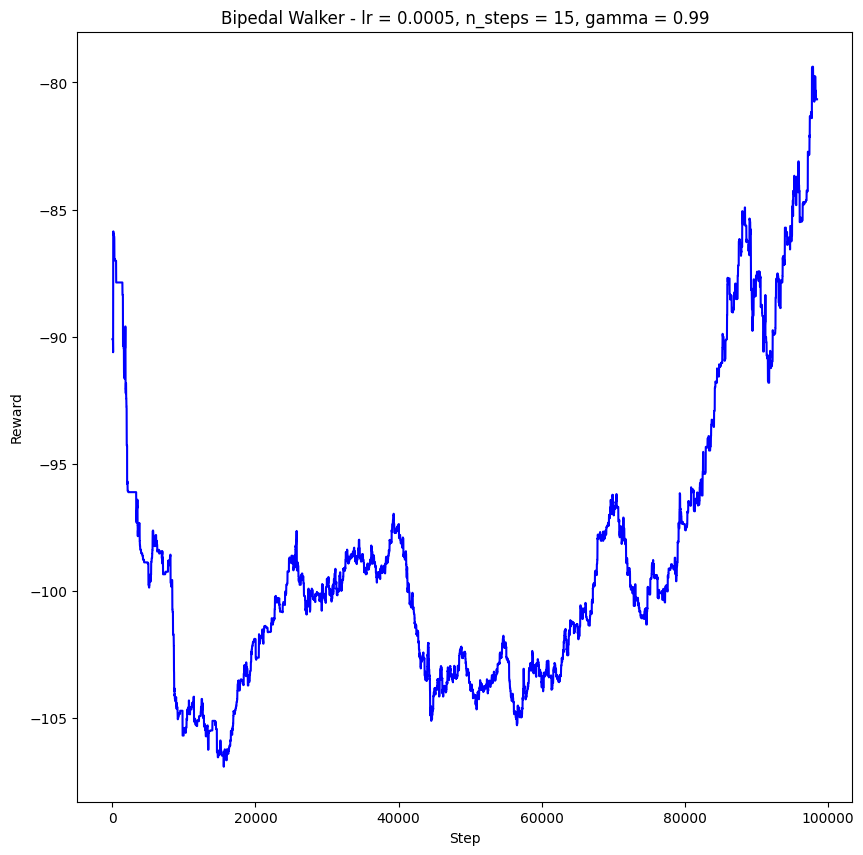

In [147]:
plt.plot([(i+1) * 6 for i in range(len(means))], means, 'b-')

plt.ylabel('Reward')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - lr = {HYPERPARAMETERS[0]["learning_rate"]}, n_steps = {HYPERPARAMETERS[0]["n_steps"]}, gamma = {HYPERPARAMETERS[0]["gamma"]}')

plt.show()

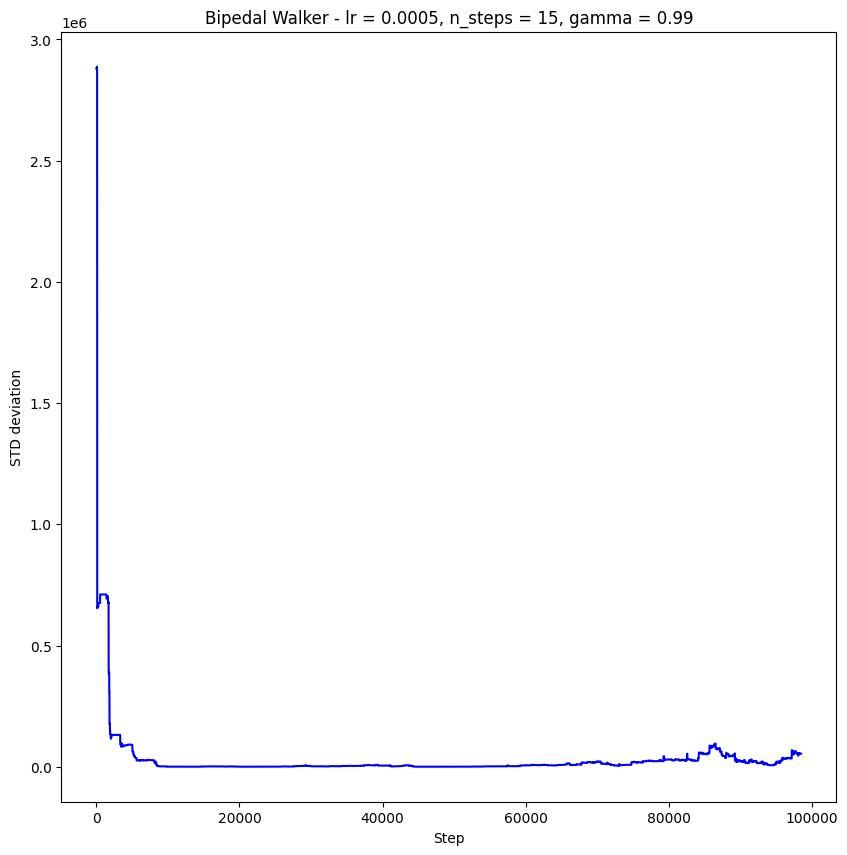

In [148]:
plt.plot([(i+1) * 6 for i in range(len(s_devs))], s_devs, 'b-')

plt.ylabel('STD deviation')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - lr = {HYPERPARAMETERS[0]["learning_rate"]}, n_steps = {HYPERPARAMETERS[0]["n_steps"]}, gamma = {HYPERPARAMETERS[0]["gamma"]}')

plt.show()

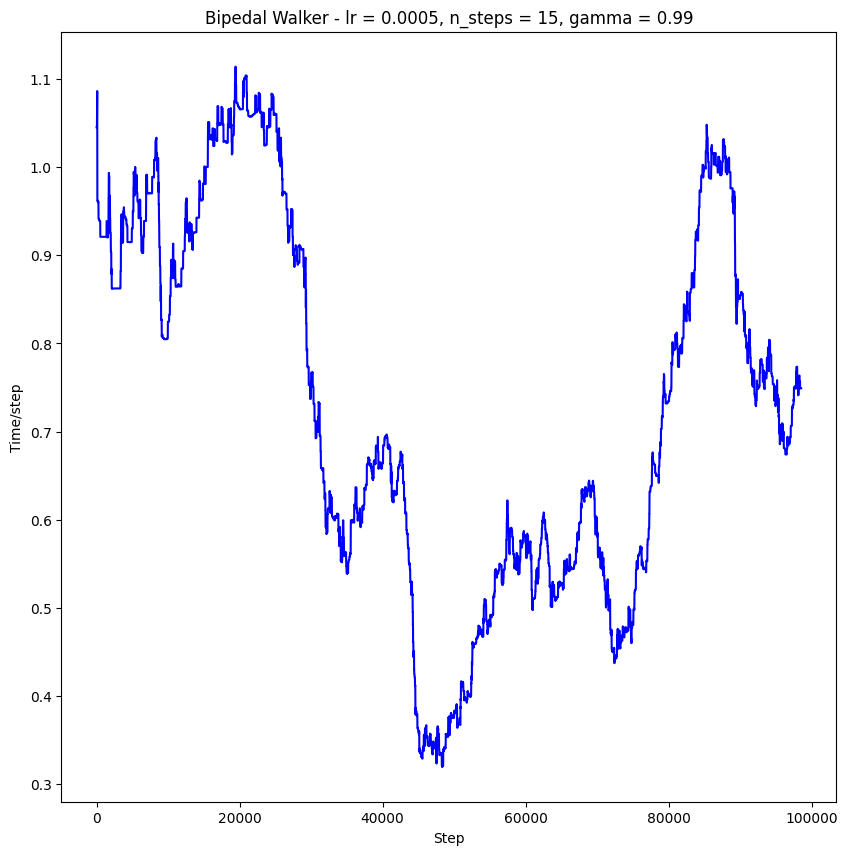

In [149]:
plt.plot([(i+1) * 6 for i in range(len(mean_times))], mean_times, 'b-')

plt.ylabel('Time/step')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - lr = {HYPERPARAMETERS[0]["learning_rate"]}, n_steps = {HYPERPARAMETERS[0]["n_steps"]}, gamma = {HYPERPARAMETERS[0]["gamma"]}')

plt.show()

In [141]:
best_h_2 = generate_with_hyperparameters(HYPERPARAMETERS[1])

compute_mean_and_std()

Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 74       |
|    ep_rew_mean        | -105     |
| time/                 |          |
|    fps                | 615      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -5.66    |
|    explained_variance | 0.00719  |
|    learning_rate      | 0.0003   |
|    n_updates          | 99       |
|    policy_loss        | -2.75    |
|    std                | 0.997    |
|    value_loss         | 0.344    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 837      |
|    ep_rew_mean        | -93.8    |
| time/                 |          |
|    fps                | 652      |
|    iterations         | 200      |
|    time_elapsed      

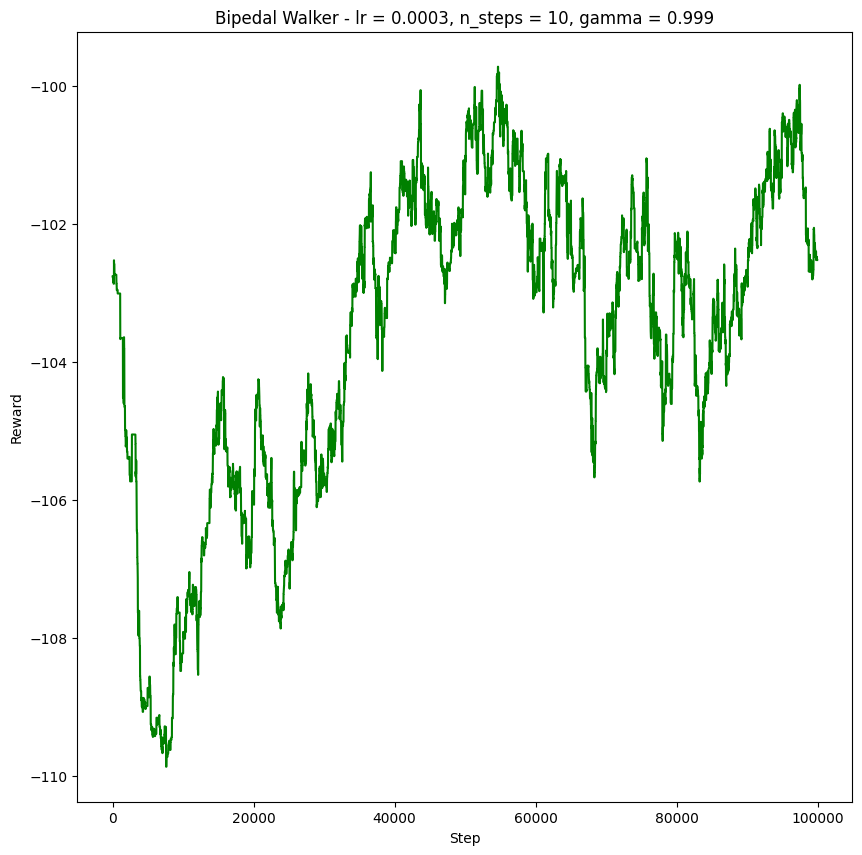

In [142]:
plt.plot([(i+1) * 6 for i in range(len(means))], means, 'g-')

plt.ylabel('Reward')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - lr = {HYPERPARAMETERS[1]["learning_rate"]}, n_steps = {HYPERPARAMETERS[1]["n_steps"]}, gamma = {HYPERPARAMETERS[1]["gamma"]}')

plt.show()

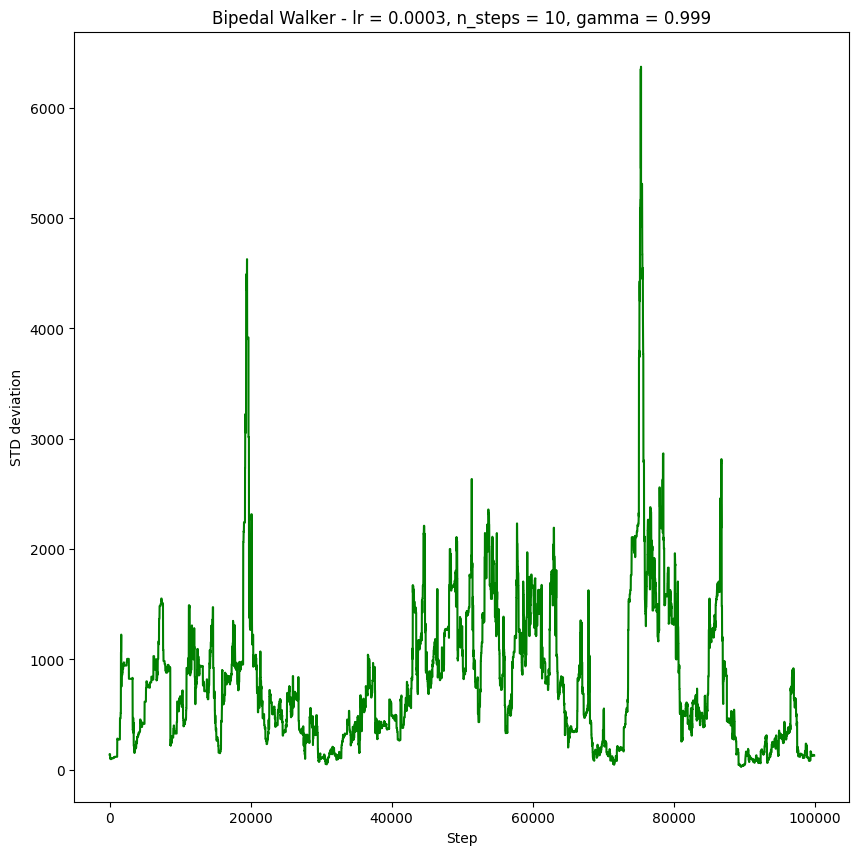

In [143]:
plt.plot([(i+1) * 6 for i in range(len(s_devs))], s_devs, 'g-')

plt.ylabel('STD deviation')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - lr = {HYPERPARAMETERS[1]["learning_rate"]}, n_steps = {HYPERPARAMETERS[1]["n_steps"]}, gamma = {HYPERPARAMETERS[1]["gamma"]}')

plt.show()

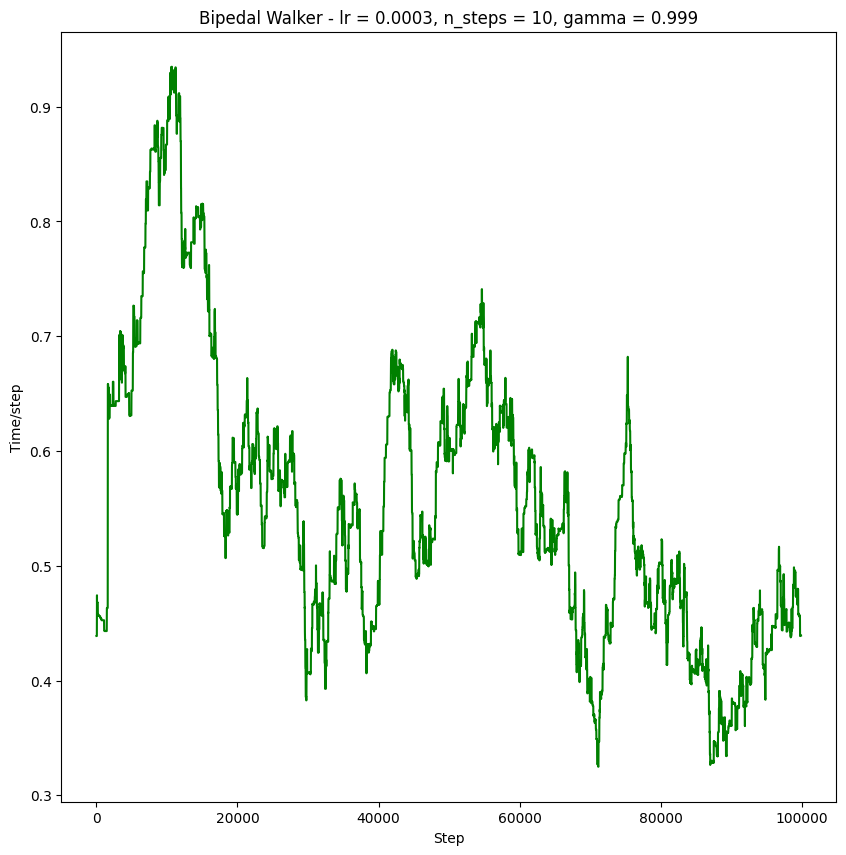

In [144]:
plt.plot([(i+1) * 6 for i in range(len(mean_times))], mean_times, 'g-')

plt.ylabel('Time/step')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - lr = {HYPERPARAMETERS[1]["learning_rate"]}, n_steps = {HYPERPARAMETERS[1]["n_steps"]}, gamma = {HYPERPARAMETERS[1]["gamma"]}')

plt.show()

In [76]:
best_h_3 = generate_with_hyperparameters(HYPERPARAMETERS[2])

compute_mean_and_std()

Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1.02e+03 |
|    ep_rew_mean        | -156     |
| time/                 |          |
|    fps                | 778      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 2500     |
| train/                |          |
|    entropy_loss       | -5.63    |
|    explained_variance | 0.264    |
|    learning_rate      | 0.0008   |
|    n_updates          | 99       |
|    policy_loss        | -1.27    |
|    std                | 0.989    |
|    value_loss         | 0.0695   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 865      |
|    ep_rew_mean        | -112     |
| time/                 |          |
|    fps                | 766      |
|    iterations         | 200      |
|    time_elapsed      

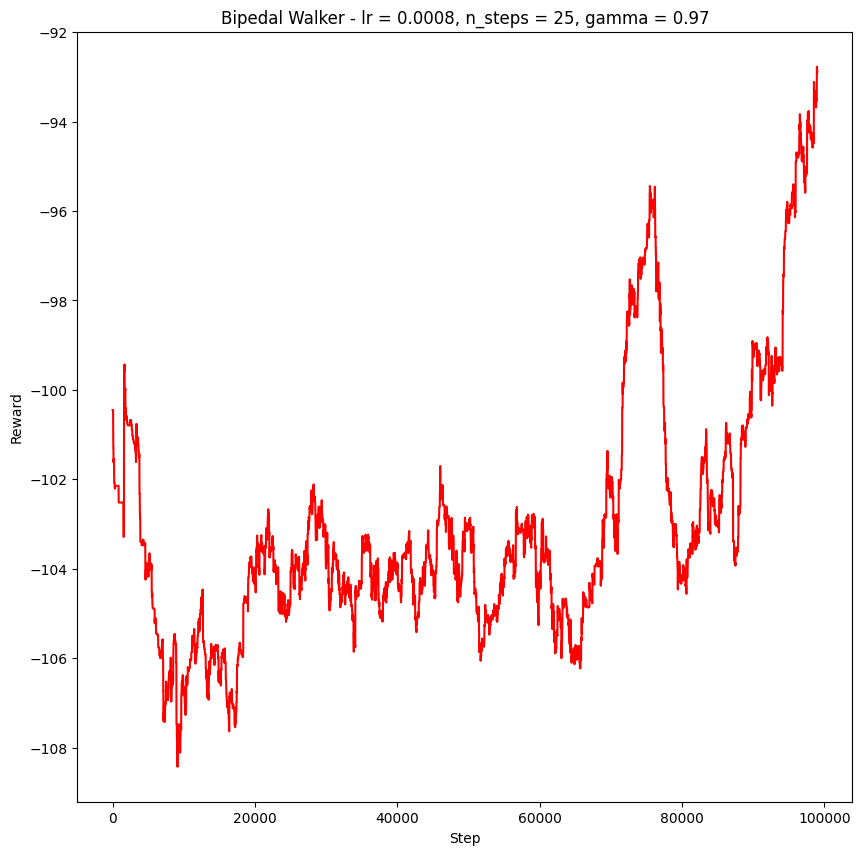

In [77]:
plt.plot([(i+1) * 6 for i in range(len(means))], means, 'b-')

plt.ylabel('Reward')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - lr = {HYPERPARAMETERS[2]["learning_rate"]}, n_steps = {HYPERPARAMETERS[2]["n_steps"]}, gamma = {HYPERPARAMETERS[2]["gamma"]}')

plt.show()

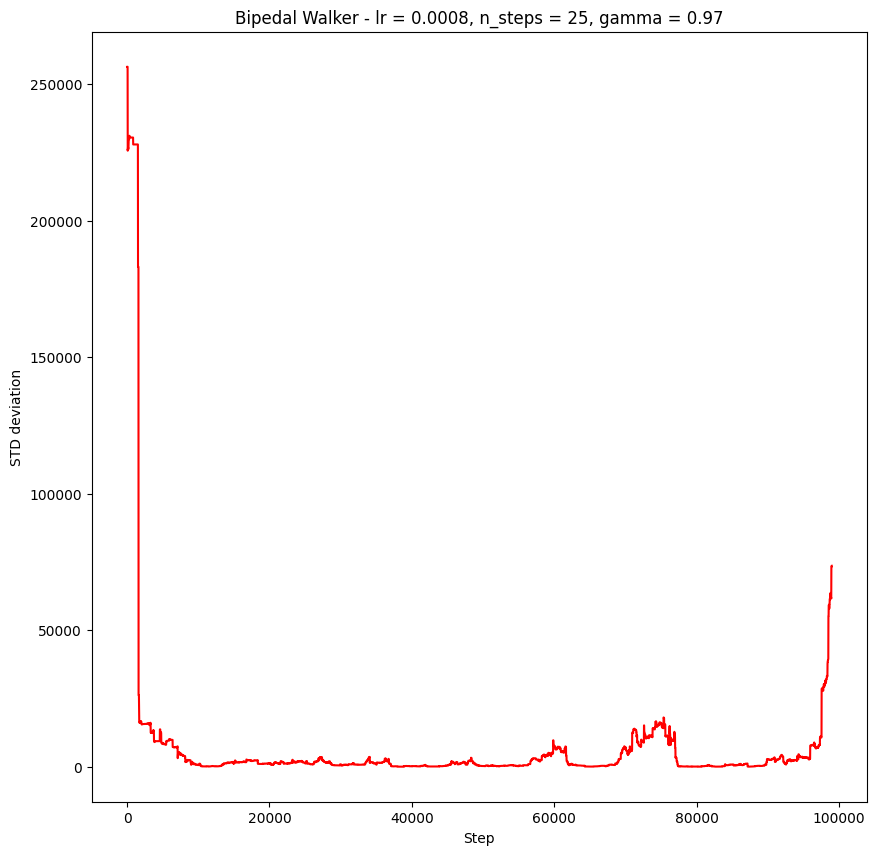

In [78]:
plt.plot([(i+1) * 6 for i in range(len(s_devs))], s_devs, 'b-')

plt.ylabel('STD deviation')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - lr = {HYPERPARAMETERS[2]["learning_rate"]}, n_steps = {HYPERPARAMETERS[2]["n_steps"]}, gamma = {HYPERPARAMETERS[2]["gamma"]}')

plt.show()

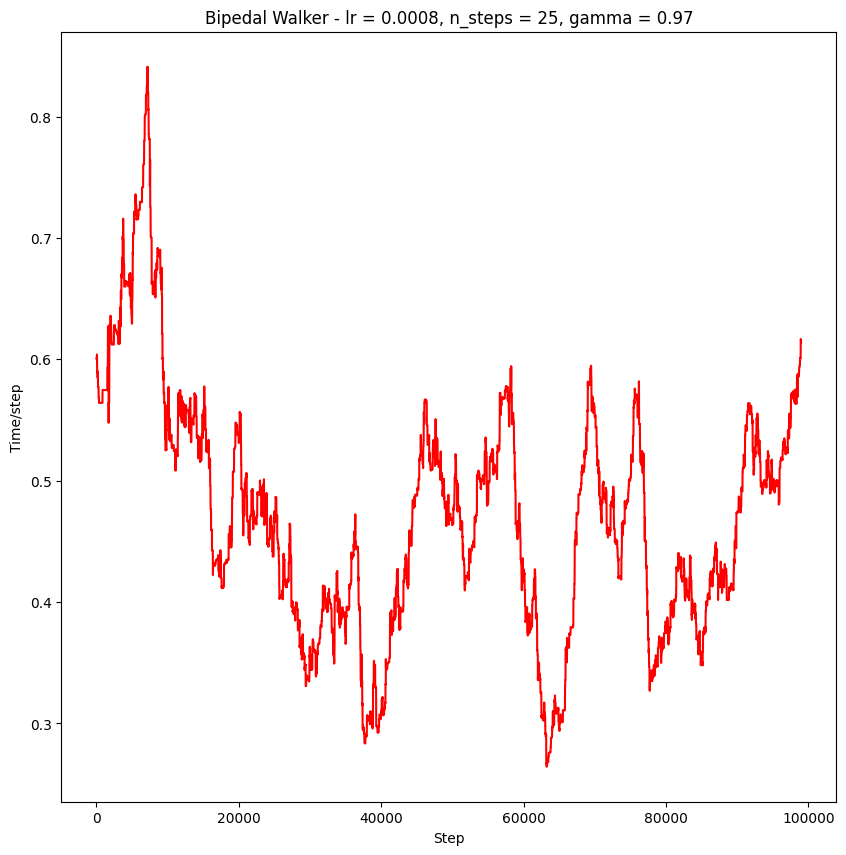

In [79]:
plt.plot([(i+1) * 6 for i in range(len(mean_times))], mean_times, 'b-')

plt.ylabel('Time/step')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - lr = {HYPERPARAMETERS[2]["learning_rate"]}, n_steps = {HYPERPARAMETERS[2]["n_steps"]}, gamma = {HYPERPARAMETERS[2]["gamma"]}')

plt.show()

Wnioski:
* Najlepszy jest model numer 3 - szczególy w sprawozdaniu.

In [80]:
import torch
import torch.nn as nn
from stable_baselines3 import A2C
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor


class SimplerNetwork(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=4) -> None:
        super().__init__(observation_space, features_dim)
        self.net = nn.Sequential(
            nn.Linear(observation_space.shape[0], 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, features_dim),
            nn.ReLU(),
        )

    def forward(self, observations):
        return self.net(observations)

class SimplerPolicy(ActorCriticPolicy):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(
            *args,
            **kwargs,
            features_extractor_class=SimplerNetwork,
            features_extractor_kwargs=dict(features_dim=4),
        )

In [81]:
from gymnasium.vector.utils import spaces


class AdvancedNetwork(BaseFeaturesExtractor):
    def __init__(self, observation_space: spaces.Space, features_dim: int = 4):
        super().__init__(observation_space, features_dim)
        self.net = nn.Sequential(
            nn.Linear(observation_space.shape[0], 32),
            nn.Tanh(),
            nn.Linear(32, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, features_dim),
            nn.Tanh()
        )

    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        return self.net(observations)

class AdvancedPolicy(ActorCriticPolicy):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(
            *args,
            **kwargs,
            features_extractor_class=AdvancedNetwork,
            features_extractor_kwargs=dict(features_dim=4),
        )


In [82]:
ARCHITECTURES = [
    {
        "learning_rate": 0.0004,
        "n_steps": 10,
        "gamma": 0.999,
        "policy": SimplerPolicy,
    },
    {
        "learning_rate": 0.0004,
        "n_steps": 10,
        "gamma": 0.999,
        "policy": AdvancedPolicy,
    },
]

In [83]:
mock = gymnasium.make("BipedalWalker-v3")
mock = Monitor(mock, LOG_DIR)
mock.reset()

A2C(env=mock, verbose=1, **ARCHITECTURES[0]).policy

Using cpu device
Wrapping the env in a DummyVecEnv.


SimplerPolicy(
  (features_extractor): SimplerNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
      (5): ReLU()
    )
  )
  (pi_features_extractor): SimplerNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
      (5): ReLU()
    )
  )
  (vf_features_extractor): SimplerNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
      (5): ReLU()
    )
  )
  (mlp_extractor): MlpExtractor(
    (polic

In [84]:
A2C(env=mock, verbose=1, **ARCHITECTURES[1]).policy

Using cpu device
Wrapping the env in a DummyVecEnv.


AdvancedPolicy(
  (features_extractor): AdvancedNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): Tanh()
      (8): Linear(in_features=64, out_features=4, bias=True)
      (9): Tanh()
    )
  )
  (pi_features_extractor): AdvancedNetwork(
    (net): Sequential(
      (0): Linear(in_features=24, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): Tanh()
      (4): Linear(in_features=64, out_features=128, bias=True)
      (5): Tanh()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): Tanh()
      (8): Linear(in_features=64, out_features=4, bias=True)
      (9): Tanh()
    )
  )
  (vf_features_extractor): Adva

In [85]:
best_a_1 = generate_with_hyperparameters(ARCHITECTURES[0])

compute_mean_and_std()

Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 70.4     |
|    ep_rew_mean        | -109     |
| time/                 |          |
|    fps                | 563      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -5.7     |
|    explained_variance | -0.414   |
|    learning_rate      | 0.0004   |
|    n_updates          | 99       |
|    policy_loss        | -1.89    |
|    std                | 1.01     |
|    value_loss         | 0.156    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 325      |
|    ep_rew_mean        | -109     |
| time/                 |          |
|    fps                | 547      |
|    iterations         | 200      |
|    time_elapsed      

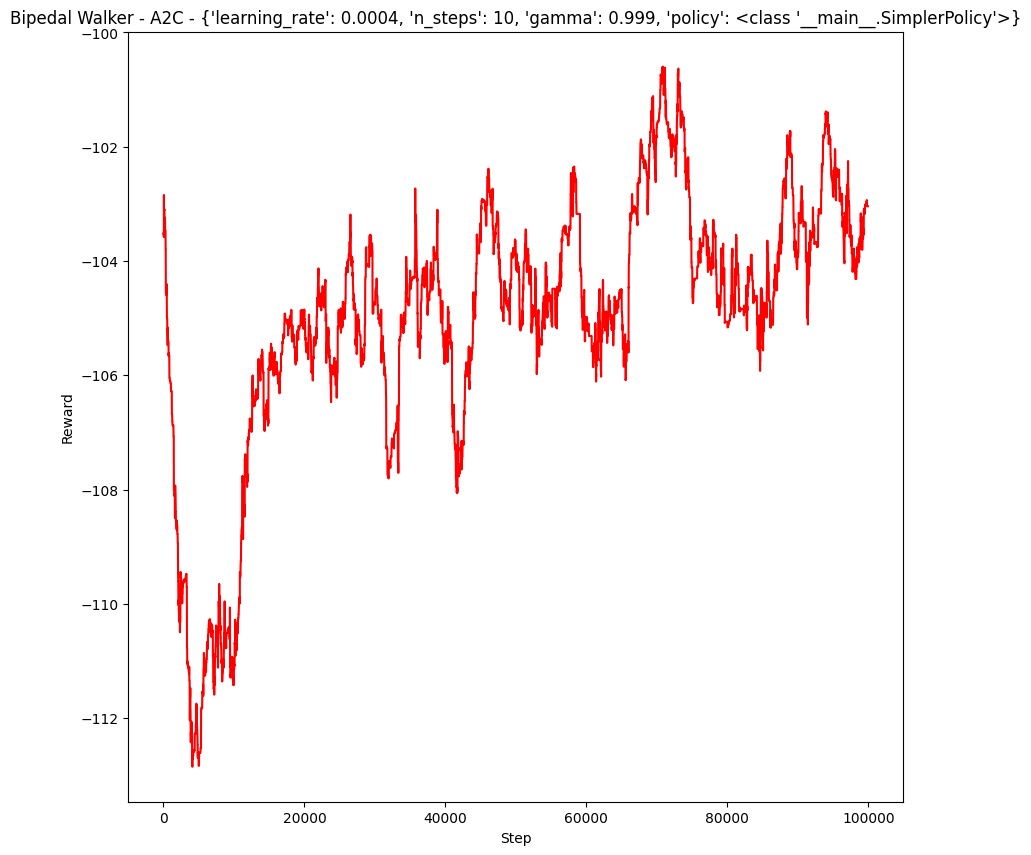

In [86]:
plt.plot([(i+1) * 6 for i in range(len(means))], means, 'b-')


plt.ylabel('Reward')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - A2C - {ARCHITECTURES[0]}')

plt.show()

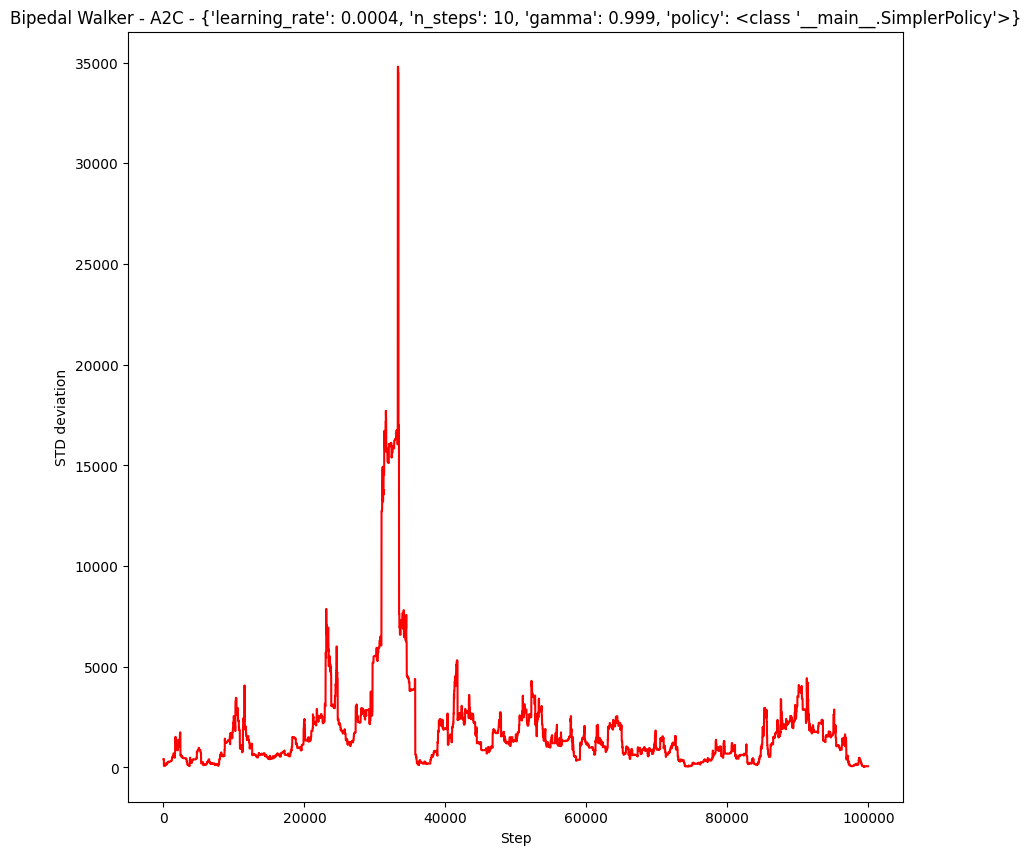

In [87]:
plt.plot([(i+1) * 6 for i in range(len(s_devs))], s_devs, 'b-')

plt.ylabel('STD deviation')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - A2C - {ARCHITECTURES[0]}')



plt.show()

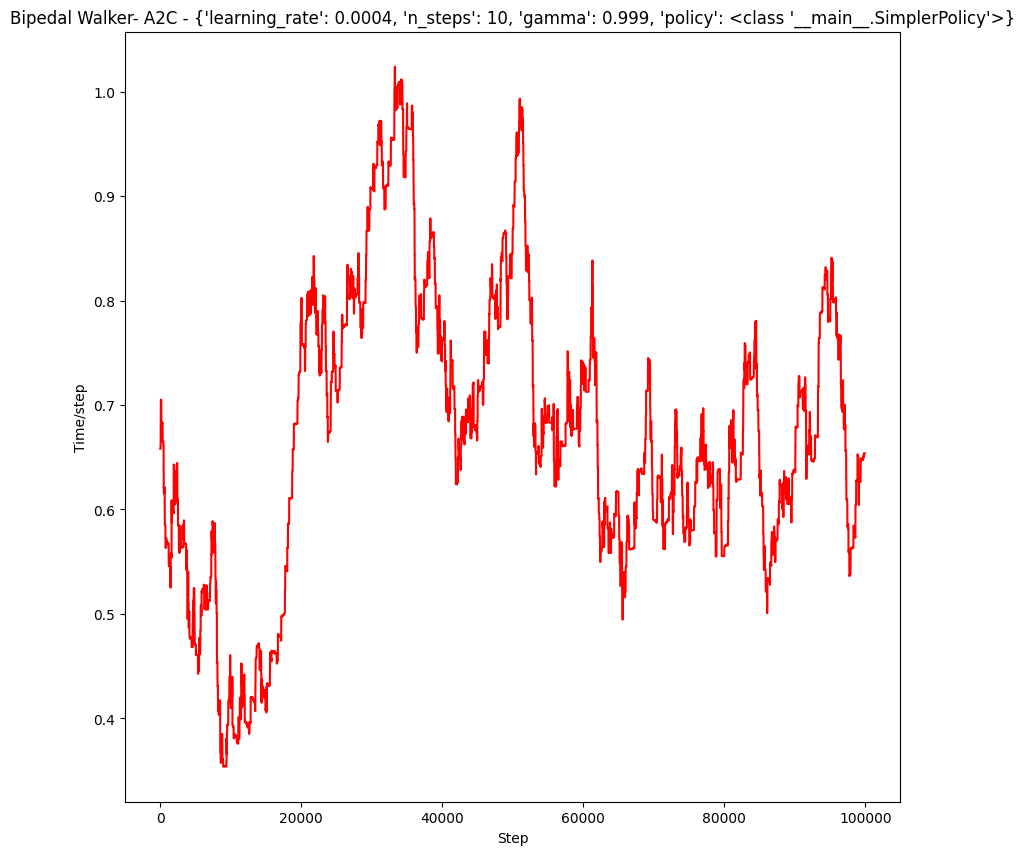

In [88]:
plt.plot([(i+1) * 6 for i in range(len(mean_times))], mean_times, 'b-')

plt.ylabel('Time/step')
plt.xlabel('Step')
plt.title(f'Bipedal Walker- A2C - {ARCHITECTURES[0]}')

plt.show()

In [89]:
best_a_2 = generate_with_hyperparameters(ARCHITECTURES[1])

compute_mean_and_std()

Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 563      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -5.68    |
|    explained_variance | -0.0255  |
|    learning_rate      | 0.0004   |
|    n_updates          | 99       |
|    policy_loss        | -0.425   |
|    std                | 1        |
|    value_loss         | 0.0307   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 852      |
|    ep_rew_mean        | -98.7    |
| time/                 |          |
|    fps                | 578      |
|    iterations         | 200      |
|    time_elapsed       | 3        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss      

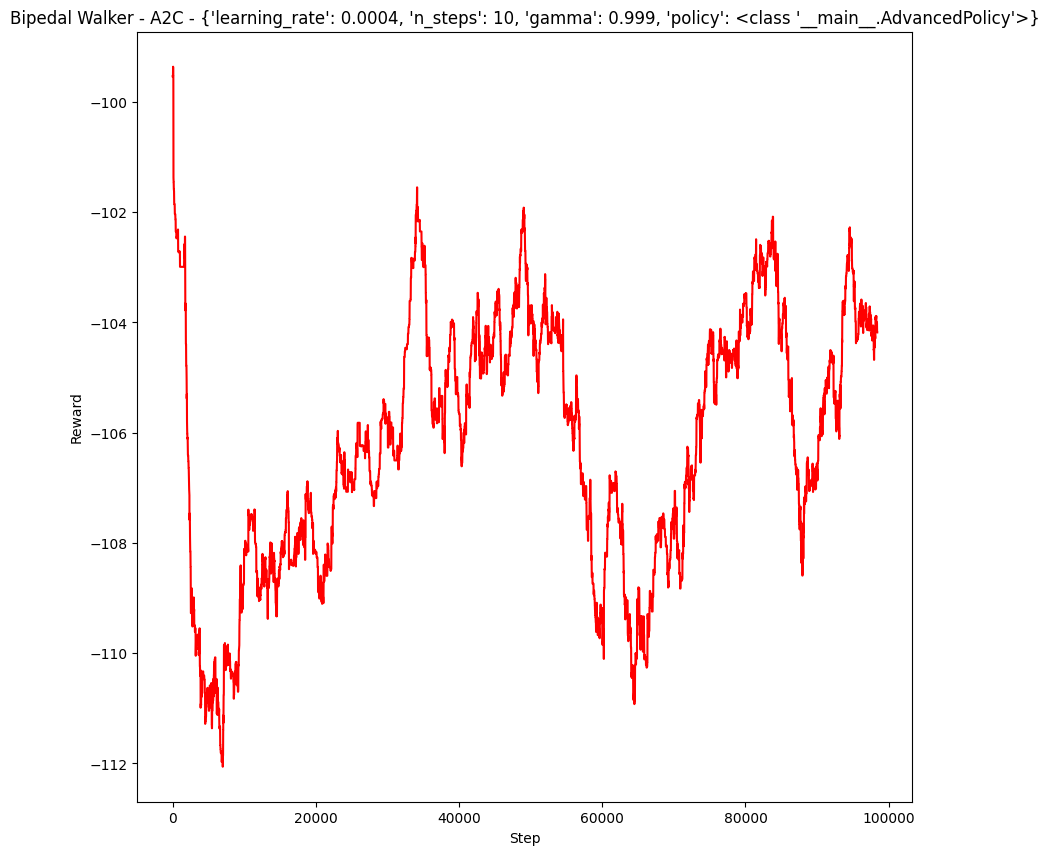

In [90]:
plt.plot([(i+1) * 6 for i in range(len(means))], means, 'b-')

plt.ylabel('Reward')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - A2C - {ARCHITECTURES[1]}')

plt.show()

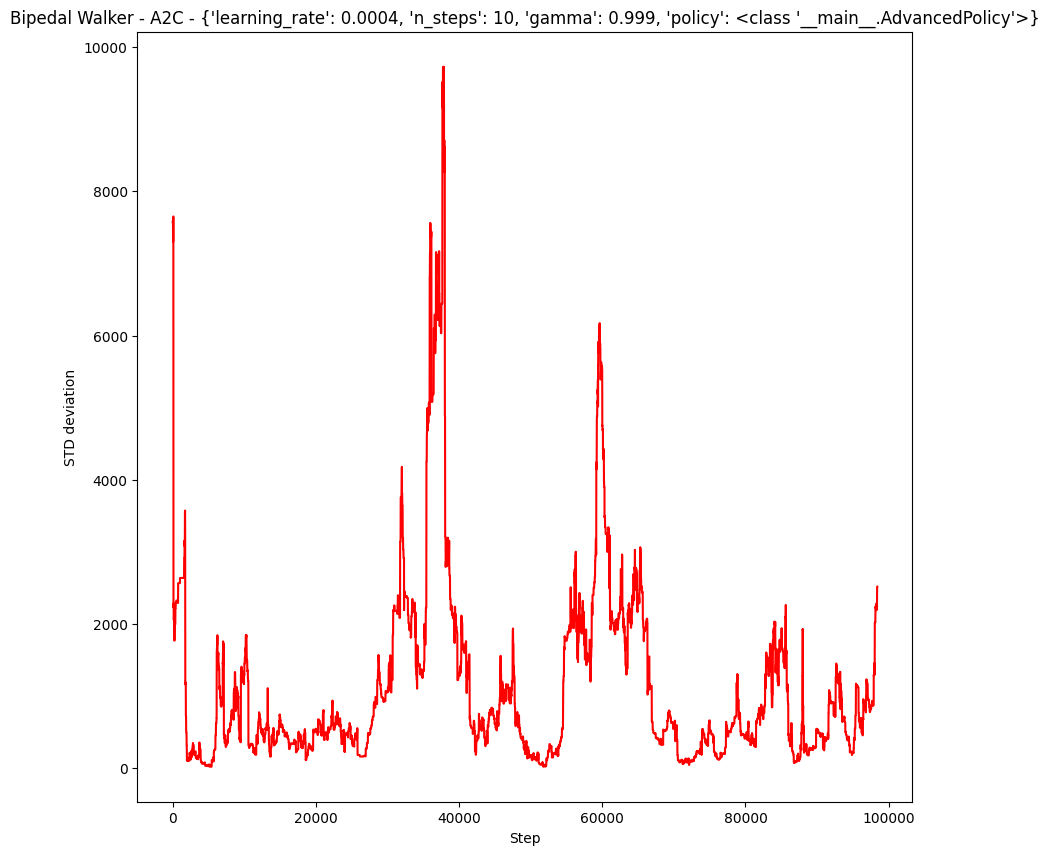

In [91]:
plt.plot([(i+1) * 6 for i in range(len(s_devs))], s_devs, 'b-')

plt.ylabel('STD deviation')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - A2C - {ARCHITECTURES[1]}')

plt.show()

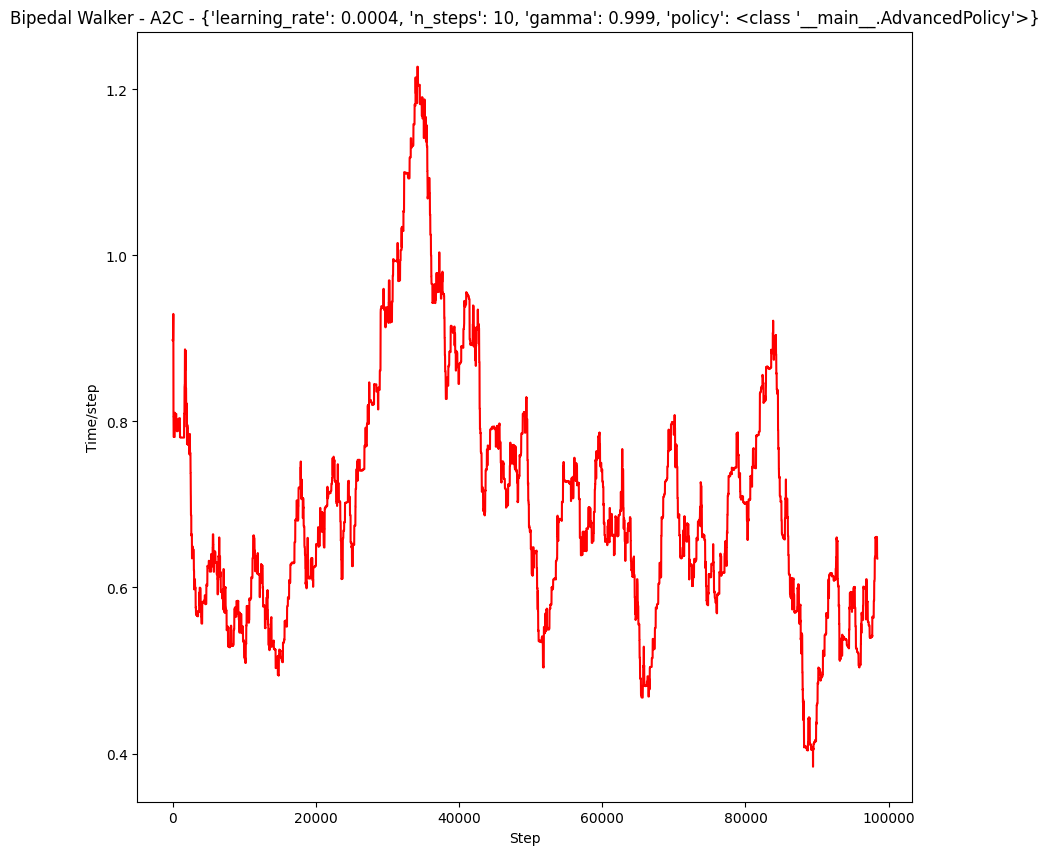

In [92]:
plt.plot([(i+1) * 6 for i in range(len(mean_times))], mean_times, 'b-')

plt.ylabel('Time/step')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - A2C - {ARCHITECTURES[1]}')

plt.show()

In [193]:
ATTEMPTS: Final[int] = 1
STEPS_PER_ATTEMPT: Final[int] = 50000

best_model = best_a_2[0]
# run the environment with the best model, once, for 5000 steps

env = gymnasium.make("BipedalWalker-v3")
env = Monitor(env, LOG_DIR)
env.reset()

hp = ARCHITECTURES[1]

for _ in range(ATTEMPTS):
    model = A2C(env=env, verbose=1, device="cpu", **hp)
    logger = DataLoggerCallback(LOG_DIR)
    
    model.learn(total_timesteps=STEPS_PER_ATTEMPT, callback=logger)




Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 70       |
|    ep_rew_mean        | -109     |
| time/                 |          |
|    fps                | 523      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -5.68    |
|    explained_variance | 0.000869 |
|    learning_rate      | 0.0004   |
|    n_updates          | 99       |
|    policy_loss        | -2.88    |
|    std                | 1        |
|    value_loss         | 0.31     |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 70        |
|    ep_rew_mean        | -109      |
| time/                 |           |
|    fps                | 524       |
|    iterations         | 200       |
|    time_elapse

In [ ]:
plt.plot([(i+1) * 6 for i in range(len(logger.episode_rewards))], logger.episode_rewards, 'b-')

plt.ylabel('Reward')
plt.xlabel('Step')
plt.title(f'Bipedal Walker - Best model')

plt.show()